# Continuous Systems


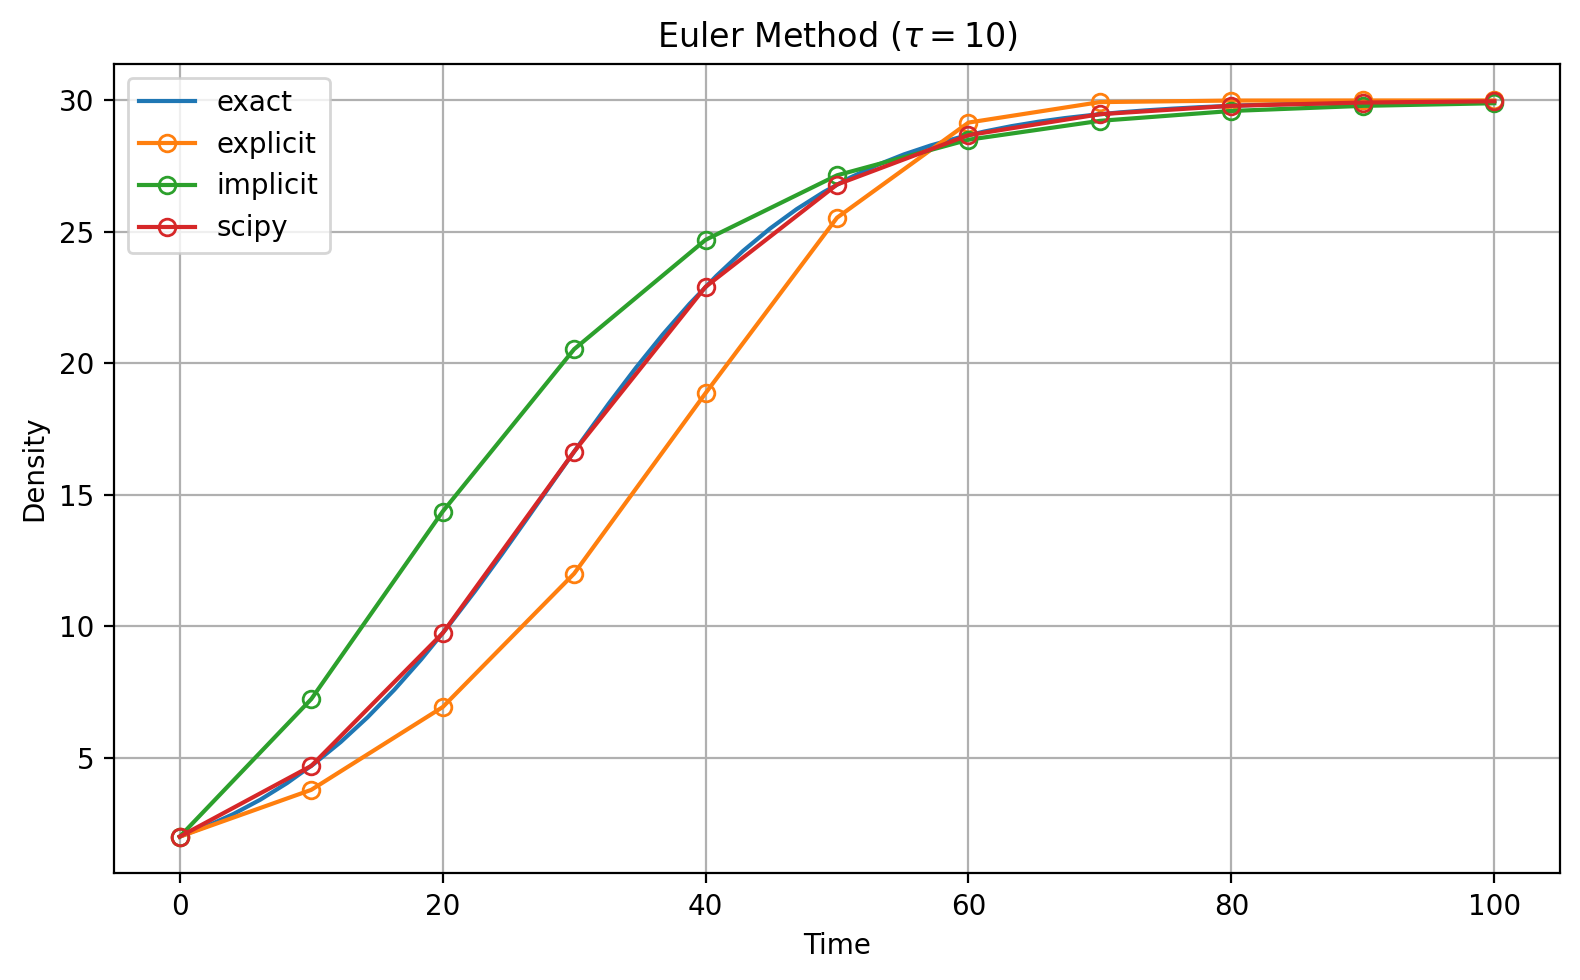

In [2]:
from simulate import euler
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def logistic(n0, t, r, K):
    return K / (1 + (K / n0 - 1) * np.exp(-r * t))

def derivative(n0, t, r, K):
    return r * n0 * (1 - n0 / K)


n0 = 2
rate = np.log(1.1)
k = 30
step = 10

plt.figure(figsize=(8, 5), dpi=200)
plt.title(rf"Euler Method ($\tau = {step}$)")

# exact solution
exact_sol = [logistic(n0, t, rate, k) for t in np.linspace(0, 100, 50)]
plt.plot(np.linspace(0, 100, 50), exact_sol, label="exact")

# euler
timesteps = [t for t in range(0, 100 + step, step)]
i_times, i_values = euler.explicit(derivative, n0, (rate, k), timesteps)
plt.plot(i_times, i_values, marker="o", mfc="none", label="explicit")

i_times, i_values = euler.implicit(derivative, n0, (rate, k), timesteps)
plt.plot(i_times, i_values, marker="o", mfc="none", label="implicit")

# scipy odeint
sol = odeint(derivative, n0, timesteps, args=(rate, k))
plt.plot(timesteps, sol, marker="o", mfc="none", label="scipy")

plt.xlabel("Time")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()